In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from datetime import datetime
from datetime import timezone

In [2]:
CORONA_CASES_URL = "https://www.worldometers.info/coronavirus/"

In [3]:
page = requests.get(CORONA_CASES_URL)
soup = BeautifulSoup(page.content, 'html.parser')
scripts = soup.find_all("script")

In [4]:
data_script = ""

for script in scripts:
    for line in script:
        if "coronavirus-cases-linear" in str(line):
            data_script = line
            break

data_script = data_script[data_script.find("coronavirus-cases-daily"): -1]

In [5]:
start_categories = data_script.find('[', data_script.find('categories'))
end_categories = data_script.find(']', start_categories)
categories = data_script[start_categories + 1: end_categories].replace('"', '').split(',')

In [6]:
start_data = data_script.find('[', data_script.find('data'))
end_data = data_script.find(']', start_data)
data = data_script[start_data + 1: end_data].split(',')

In [7]:
for i, val in enumerate(data):
    if(val == 'null'):
        data.pop(i)
        categories.pop(i)

In [8]:
data_int = []
for value in data:
    data_int.append(int(value))
data = data_int

In [9]:
data = np.array(data)
categories = np.array(categories)

In [10]:
# initiate the model
lr = LinearRegression() 

In [11]:
# 'x' needs to be a column vector
numdates = np.arange(len(data))
numdates = numdates.reshape(-1,1)

# linear regression model
predicted = cross_val_predict(lr, numdates, data, cv=10)

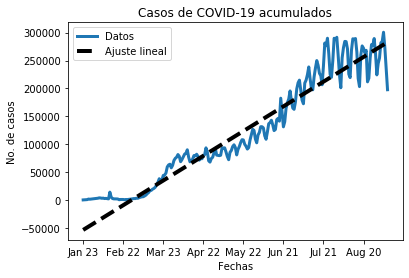

El coeficiente de determinacion es  0.9049665789355931


In [12]:
# Graph
fig, ax = plt.subplots()
tik=np.arange(0,len(categories),30)
ax.plot(numdates, data,lw=3, label='Datos')
ax.plot([numdates.min(), numdates.max()], [predicted.min(), predicted.max()], 'k--', lw=4,label='Ajuste lineal')
ax.set_xlabel('Fechas')
ax.set_ylabel('No. de casos')
plt.xticks(numdates[tik],categories[tik])
plt.title('Casos de COVID-19 acumulados')
plt.legend()
plt.show()

# coefficient of determination
R2 = r2_score(data,predicted)
print('El coeficiente de determinacion es ',R2)

In [13]:
guess_year = "2020"
categories_with_year = []
for date in categories:
    categories_with_year.append(datetime.strptime(date + " " + guess_year, '%b %d %Y'))

In [14]:
categories_timestamp = [] 
for date in categories_with_year:
    categories_timestamp.append(date.replace(tzinfo=timezone.utc).timestamp())

In [15]:
categories_timestamp = np.array(categories_timestamp)
categories_timestamp = categories_timestamp.reshape(-1,1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(categories_timestamp,data,test_size=0.1,random_state=42)

In [17]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

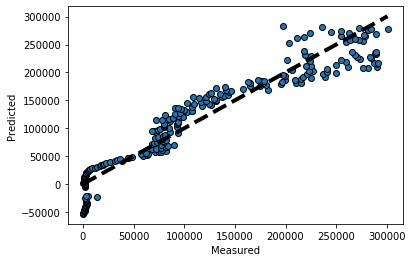

In [18]:
predicted = cross_val_predict(lr, categories_timestamp, data, cv=10)

fig, ax = plt.subplots()
ax.scatter(data, predicted, edgecolors=(0, 0, 0))
ax.plot([data.min(), data.max()], [data.min(), data.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()